## Sign Language Recognition
### Big Project Notebook
* Suhas Sahu (1003370)
* Sidharth Praveen (1003647)
* Noorbakht Khan (1003827)
* Richard Pung Tuck Wei (1003523)
* Ong Li-Chang (1003328)



### Table of Contents 
* Directory Initialization 
* Transforms Initialization
* Dataset/Dataloader Splits
* GCN Model Training
* Accuracy and Loss plots 
* Evaluation
* Loading a trained model

#### Directory Initializations

In [1]:
import os
import torch
from torchvision import transforms, utils
from videotransforms import RandomCrop, CenterCrop, RandomHorizontalFlip, Normalize
direc = '/home/jovyan/Documents/DL/DL_Project/WLASL'
subset = 'asl100'
split_file = os.path.join(direc, 'data/splits/{}.json'.format(subset))
pose_data = os.path.join(direc, 'data/pose_per_individual_videos')

In [5]:
from configs import Config
config_file = os.path.join(direc, 'sign-language-recognition/{}.ini'.format(subset))
configs = Config(config_file)
 
epochs = configs.max_epochs
log_interval = configs.log_interval
num_samples = configs.num_samples
hidden_size = configs.hidden_size
drop_p = configs.drop_p
num_stages = configs.num_stages

#### Transforms Initializations

In [3]:
transformations = transforms.Compose([

    transforms.Grayscale(3),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
])

### Without Transformations

#### Dataset Distribution

In [3]:
from dataloader import Sign_Dataset

train_dataset = Sign_Dataset(file_name_index=split_file, split=['train', 'val'], pose_directory=pose_data, img_transforms=None, video_transforms=None, num_samples=num_samples)

train_data_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=configs.batch_size,
                                                    shuffle=True)

val_dataset = Sign_Dataset(file_name_index=split_file, split='test', pose_directory=pose_data,
                               img_transforms=None, video_transforms=None,
                               num_samples=num_samples, sampling_method='k_copies')
    
val_data_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=configs.batch_size,
                                                  shuffle=True)

In [5]:
print("Dataloader split for training: {}".format(len(train_dataset)))
print("Dataloader split for testing {}".format(len(val_dataset)))


Dataloader split for training: 1780
Dataloader split for testing 258


In [6]:
import json
with open(split_file, 'r') as f:
    content = json.load(f)

        # create label encoder
labels = sorted([label_entry['gloss'] for label_entry in content])

In [7]:
print("Number of classes: {}\n".format(len(labels)))
print(labels)

Number of classes: 100

['accident', 'africa', 'all', 'apple', 'basketball', 'bed', 'before', 'bird', 'birthday', 'black', 'blue', 'book', 'bowling', 'brown', 'but', 'can', 'candy', 'chair', 'change', 'cheat', 'city', 'clothes', 'color', 'computer', 'cook', 'cool', 'corn', 'cousin', 'cow', 'dance', 'dark', 'deaf', 'decide', 'doctor', 'dog', 'drink', 'eat', 'enjoy', 'family', 'fine', 'finish', 'fish', 'forget', 'full', 'give', 'go', 'graduate', 'hat', 'hearing', 'help', 'hot', 'how', 'jacket', 'kiss', 'language', 'last', 'later', 'letter', 'like', 'man', 'many', 'medicine', 'meet', 'mother', 'need', 'no', 'now', 'orange', 'paint', 'paper', 'pink', 'pizza', 'play', 'pull', 'purple', 'right', 'same', 'school', 'secretary', 'shirt', 'short', 'son', 'study', 'table', 'tall', 'tell', 'thanksgiving', 'thin', 'thursday', 'time', 'walk', 'want', 'what', 'white', 'who', 'woman', 'work', 'wrong', 'year', 'yes']


#### GCN Model Training

In [26]:
!python3 ./train.py

Training now...Epoch[1/50]
Train Epoch: 1 [64/1780 (4%)]	Loss: 4.594736, Accu: 1.562500%
Train Epoch: 1 [128/1780 (7%)]	Loss: 4.602574, Accu: 0.000000%
Train Epoch: 1 [192/1780 (11%)]	Loss: 4.594132, Accu: 1.562500%
Train Epoch: 1 [256/1780 (14%)]	Loss: 5.446862, Accu: 0.000000%
Train Epoch: 1 [320/1780 (18%)]	Loss: 5.271796, Accu: 1.562500%
Train Epoch: 1 [384/1780 (21%)]	Loss: 5.074813, Accu: 0.000000%
Train Epoch: 1 [448/1780 (25%)]	Loss: 5.253891, Accu: 1.562500%
Train Epoch: 1 [512/1780 (29%)]	Loss: 5.050329, Accu: 1.562500%
Train Epoch: 1 [576/1780 (32%)]	Loss: 5.288414, Accu: 1.562500%
Train Epoch: 1 [640/1780 (36%)]	Loss: 5.232315, Accu: 0.000000%
Train Epoch: 1 [704/1780 (39%)]	Loss: 5.033154, Accu: 0.000000%
Train Epoch: 1 [768/1780 (43%)]	Loss: 4.863158, Accu: 1.562500%
Train Epoch: 1 [832/1780 (46%)]	Loss: 5.076488, Accu: 1.562500%
Train Epoch: 1 [896/1780 (50%)]	Loss: 4.937426, Accu: 1.562500%
Train Epoch: 1 [960/1780 (54%)]	Loss: 4.788558, Accu: 0.000000%
Train Epoch: 1 [

Train Epoch: 5 [576/1780 (32%)]	Loss: 4.535926, Accu: 3.125000%
Train Epoch: 5 [640/1780 (36%)]	Loss: 4.548051, Accu: 3.125000%
Train Epoch: 5 [704/1780 (39%)]	Loss: 4.570102, Accu: 0.000000%
Train Epoch: 5 [768/1780 (43%)]	Loss: 4.536298, Accu: 6.250000%
Train Epoch: 5 [832/1780 (46%)]	Loss: 4.562615, Accu: 0.000000%
Train Epoch: 5 [896/1780 (50%)]	Loss: 4.546593, Accu: 4.687500%
Train Epoch: 5 [960/1780 (54%)]	Loss: 4.541355, Accu: 1.562500%
Train Epoch: 5 [1024/1780 (57%)]	Loss: 4.568842, Accu: 1.562500%
Train Epoch: 5 [1088/1780 (61%)]	Loss: 4.569017, Accu: 4.687500%
Train Epoch: 5 [1152/1780 (64%)]	Loss: 4.522678, Accu: 3.125000%
Train Epoch: 5 [1216/1780 (68%)]	Loss: 4.508345, Accu: 1.562500%
Train Epoch: 5 [1280/1780 (71%)]	Loss: 4.532149, Accu: 1.562500%
Train Epoch: 5 [1344/1780 (75%)]	Loss: 4.541076, Accu: 3.125000%
Train Epoch: 5 [1408/1780 (79%)]	Loss: 4.580458, Accu: 7.812500%
Train Epoch: 5 [1472/1780 (82%)]	Loss: 4.570284, Accu: 0.000000%
Train Epoch: 5 [1536/1780 (86%)]

Train Epoch: 9 [1088/1780 (61%)]	Loss: 3.767361, Accu: 9.375000%
Train Epoch: 9 [1152/1780 (64%)]	Loss: 3.767352, Accu: 10.937500%
Train Epoch: 9 [1216/1780 (68%)]	Loss: 3.831400, Accu: 7.812500%
Train Epoch: 9 [1280/1780 (71%)]	Loss: 3.855289, Accu: 12.500000%
Train Epoch: 9 [1344/1780 (75%)]	Loss: 3.833764, Accu: 6.250000%
Train Epoch: 9 [1408/1780 (79%)]	Loss: 3.694162, Accu: 7.812500%
Train Epoch: 9 [1472/1780 (82%)]	Loss: 3.851478, Accu: 9.375000%
Train Epoch: 9 [1536/1780 (86%)]	Loss: 3.792333, Accu: 4.687500%
Train Epoch: 9 [1600/1780 (89%)]	Loss: 3.943311, Accu: 4.687500%
Train Epoch: 9 [1664/1780 (93%)]	Loss: 4.070048, Accu: 3.125000%
Train Epoch: 9 [1728/1780 (96%)]	Loss: 3.882886, Accu: 6.250000%
Train Epoch: 9 [1780/1780 (100%)]	Loss: 3.628001, Accu: 13.461538%
Testing now...Epoch[9/50]

Val. set (258 samples): Average loss: 3.7847, Accuracy: 6.20%

Training now...Epoch[10/50]
Train Epoch: 10 [64/1780 (4%)]	Loss: 3.815650, Accu: 7.812500%
Train Epoch: 10 [128/1780 (7%)]	Los

Train Epoch: 13 [1408/1780 (79%)]	Loss: 3.223841, Accu: 18.750000%
Train Epoch: 13 [1472/1780 (82%)]	Loss: 3.166345, Accu: 18.750000%
Train Epoch: 13 [1536/1780 (86%)]	Loss: 3.108886, Accu: 20.312500%
Train Epoch: 13 [1600/1780 (89%)]	Loss: 3.406215, Accu: 12.500000%
Train Epoch: 13 [1664/1780 (93%)]	Loss: 3.056820, Accu: 26.562500%
Train Epoch: 13 [1728/1780 (96%)]	Loss: 3.680811, Accu: 9.375000%
Train Epoch: 13 [1780/1780 (100%)]	Loss: 3.430264, Accu: 19.230769%
Testing now...Epoch[13/50]

Val. set (258 samples): Average loss: 3.6290, Accuracy: 13.18%

Training now...Epoch[14/50]
Train Epoch: 14 [64/1780 (4%)]	Loss: 2.848459, Accu: 31.250000%
Train Epoch: 14 [128/1780 (7%)]	Loss: 3.018163, Accu: 25.000000%
Train Epoch: 14 [192/1780 (11%)]	Loss: 3.067801, Accu: 28.125000%
Train Epoch: 14 [256/1780 (14%)]	Loss: 3.185969, Accu: 15.625000%
Train Epoch: 14 [320/1780 (18%)]	Loss: 3.130670, Accu: 21.875000%
Train Epoch: 14 [384/1780 (21%)]	Loss: 2.803885, Accu: 34.375000%
Train Epoch: 14 [4

Train Epoch: 17 [1728/1780 (96%)]	Loss: 2.844815, Accu: 28.125000%
Train Epoch: 17 [1780/1780 (100%)]	Loss: 2.773695, Accu: 26.923077%
Testing now...Epoch[17/50]

Val. set (258 samples): Average loss: 3.3054, Accuracy: 16.67%

Training now...Epoch[18/50]
Train Epoch: 18 [64/1780 (4%)]	Loss: 2.782796, Accu: 31.250000%
Train Epoch: 18 [128/1780 (7%)]	Loss: 2.631987, Accu: 32.812500%
Train Epoch: 18 [192/1780 (11%)]	Loss: 2.935580, Accu: 25.000000%
Train Epoch: 18 [256/1780 (14%)]	Loss: 2.235196, Accu: 39.062500%
Train Epoch: 18 [320/1780 (18%)]	Loss: 2.429134, Accu: 35.937500%
Train Epoch: 18 [384/1780 (21%)]	Loss: 2.566969, Accu: 28.125000%
Train Epoch: 18 [448/1780 (25%)]	Loss: 2.538891, Accu: 35.937500%
Train Epoch: 18 [512/1780 (29%)]	Loss: 2.726915, Accu: 31.250000%
Train Epoch: 18 [576/1780 (32%)]	Loss: 2.485656, Accu: 34.375000%
Train Epoch: 18 [640/1780 (36%)]	Loss: 2.375058, Accu: 42.187500%
Train Epoch: 18 [704/1780 (39%)]	Loss: 2.549293, Accu: 28.125000%
Train Epoch: 18 [768/1

Train Epoch: 22 [128/1780 (7%)]	Loss: 2.027652, Accu: 53.125000%
Train Epoch: 22 [192/1780 (11%)]	Loss: 2.040658, Accu: 45.312500%
Train Epoch: 22 [256/1780 (14%)]	Loss: 2.242595, Accu: 39.062500%
Train Epoch: 22 [320/1780 (18%)]	Loss: 2.004456, Accu: 50.000000%
Train Epoch: 22 [384/1780 (21%)]	Loss: 2.183860, Accu: 39.062500%
Train Epoch: 22 [448/1780 (25%)]	Loss: 2.134648, Accu: 42.187500%
Train Epoch: 22 [512/1780 (29%)]	Loss: 2.203377, Accu: 40.625000%
Train Epoch: 22 [576/1780 (32%)]	Loss: 2.449657, Accu: 29.687500%
Train Epoch: 22 [640/1780 (36%)]	Loss: 2.093710, Accu: 51.562500%
Train Epoch: 22 [704/1780 (39%)]	Loss: 2.247951, Accu: 40.625000%
Train Epoch: 22 [768/1780 (43%)]	Loss: 2.145937, Accu: 37.500000%
Train Epoch: 22 [832/1780 (46%)]	Loss: 2.063749, Accu: 42.187500%
Train Epoch: 22 [896/1780 (50%)]	Loss: 2.190293, Accu: 42.187500%
Train Epoch: 22 [960/1780 (54%)]	Loss: 2.148367, Accu: 46.875000%
Train Epoch: 22 [1024/1780 (57%)]	Loss: 2.163508, Accu: 40.625000%
Train Epoc

Train Epoch: 26 [448/1780 (25%)]	Loss: 1.796047, Accu: 50.000000%
Train Epoch: 26 [512/1780 (29%)]	Loss: 1.870116, Accu: 50.000000%
Train Epoch: 26 [576/1780 (32%)]	Loss: 1.963134, Accu: 51.562500%
Train Epoch: 26 [640/1780 (36%)]	Loss: 2.029571, Accu: 45.312500%
Train Epoch: 26 [704/1780 (39%)]	Loss: 1.825702, Accu: 54.687500%
Train Epoch: 26 [768/1780 (43%)]	Loss: 1.756015, Accu: 54.687500%
Train Epoch: 26 [832/1780 (46%)]	Loss: 1.992697, Accu: 42.187500%
Train Epoch: 26 [896/1780 (50%)]	Loss: 2.098411, Accu: 39.062500%
Train Epoch: 26 [960/1780 (54%)]	Loss: 1.894431, Accu: 48.437500%
Train Epoch: 26 [1024/1780 (57%)]	Loss: 1.681643, Accu: 53.125000%
Train Epoch: 26 [1088/1780 (61%)]	Loss: 2.047347, Accu: 51.562500%
Train Epoch: 26 [1152/1780 (64%)]	Loss: 2.142791, Accu: 45.312500%
Train Epoch: 26 [1216/1780 (68%)]	Loss: 1.895860, Accu: 53.125000%
Train Epoch: 26 [1280/1780 (71%)]	Loss: 1.548617, Accu: 62.500000%
Train Epoch: 26 [1344/1780 (75%)]	Loss: 1.714333, Accu: 57.812500%
Trai

Train Epoch: 30 [768/1780 (43%)]	Loss: 1.849648, Accu: 56.250000%
Train Epoch: 30 [832/1780 (46%)]	Loss: 1.523408, Accu: 64.062500%
Train Epoch: 30 [896/1780 (50%)]	Loss: 1.786173, Accu: 56.250000%
Train Epoch: 30 [960/1780 (54%)]	Loss: 1.704572, Accu: 50.000000%
Train Epoch: 30 [1024/1780 (57%)]	Loss: 1.680583, Accu: 53.125000%
Train Epoch: 30 [1088/1780 (61%)]	Loss: 1.749286, Accu: 51.562500%
Train Epoch: 30 [1152/1780 (64%)]	Loss: 1.651771, Accu: 51.562500%
Train Epoch: 30 [1216/1780 (68%)]	Loss: 1.559373, Accu: 62.500000%
Train Epoch: 30 [1280/1780 (71%)]	Loss: 1.651129, Accu: 56.250000%
Train Epoch: 30 [1344/1780 (75%)]	Loss: 1.746841, Accu: 56.250000%
Train Epoch: 30 [1408/1780 (79%)]	Loss: 1.571856, Accu: 56.250000%
Train Epoch: 30 [1472/1780 (82%)]	Loss: 1.657752, Accu: 62.500000%
Train Epoch: 30 [1536/1780 (86%)]	Loss: 1.875089, Accu: 46.875000%
Train Epoch: 30 [1600/1780 (89%)]	Loss: 1.473743, Accu: 54.687500%
Train Epoch: 30 [1664/1780 (93%)]	Loss: 1.568812, Accu: 59.375000%

Train Epoch: 34 [1088/1780 (61%)]	Loss: 1.767266, Accu: 51.562500%
Train Epoch: 34 [1152/1780 (64%)]	Loss: 1.090553, Accu: 64.062500%
Train Epoch: 34 [1216/1780 (68%)]	Loss: 1.658971, Accu: 62.500000%
Train Epoch: 34 [1280/1780 (71%)]	Loss: 1.314241, Accu: 67.187500%
Train Epoch: 34 [1344/1780 (75%)]	Loss: 1.309900, Accu: 60.937500%
Train Epoch: 34 [1408/1780 (79%)]	Loss: 1.324800, Accu: 68.750000%
Train Epoch: 34 [1472/1780 (82%)]	Loss: 1.475444, Accu: 57.812500%
Train Epoch: 34 [1536/1780 (86%)]	Loss: 1.392123, Accu: 68.750000%
Train Epoch: 34 [1600/1780 (89%)]	Loss: 1.315239, Accu: 67.187500%
Train Epoch: 34 [1664/1780 (93%)]	Loss: 1.626083, Accu: 56.250000%
Train Epoch: 34 [1728/1780 (96%)]	Loss: 1.615735, Accu: 60.937500%
Train Epoch: 34 [1780/1780 (100%)]	Loss: 1.654776, Accu: 53.846154%
Testing now...Epoch[34/50]

Val. set (258 samples): Average loss: 3.1360, Accuracy: 26.36%

Training now...Epoch[35/50]
Train Epoch: 35 [64/1780 (4%)]	Loss: 1.402552, Accu: 65.625000%
Train Epoch

Train Epoch: 38 [1408/1780 (79%)]	Loss: 1.229876, Accu: 60.937500%
Train Epoch: 38 [1472/1780 (82%)]	Loss: 1.331680, Accu: 76.562500%
Train Epoch: 38 [1536/1780 (86%)]	Loss: 1.209719, Accu: 67.187500%
Train Epoch: 38 [1600/1780 (89%)]	Loss: 1.248366, Accu: 67.187500%
Train Epoch: 38 [1664/1780 (93%)]	Loss: 1.232880, Accu: 65.625000%
Train Epoch: 38 [1728/1780 (96%)]	Loss: 1.187631, Accu: 64.062500%
Train Epoch: 38 [1780/1780 (100%)]	Loss: 1.370937, Accu: 63.461538%
Testing now...Epoch[38/50]

Val. set (258 samples): Average loss: 2.9868, Accuracy: 28.29%

Training now...Epoch[39/50]
Train Epoch: 39 [64/1780 (4%)]	Loss: 1.106756, Accu: 75.000000%
Train Epoch: 39 [128/1780 (7%)]	Loss: 1.450795, Accu: 65.625000%
Train Epoch: 39 [192/1780 (11%)]	Loss: 1.186567, Accu: 68.750000%
Train Epoch: 39 [256/1780 (14%)]	Loss: 0.987679, Accu: 71.875000%
Train Epoch: 39 [320/1780 (18%)]	Loss: 1.003047, Accu: 70.312500%
Train Epoch: 39 [384/1780 (21%)]	Loss: 1.206313, Accu: 68.750000%
Train Epoch: 39 [

Train Epoch: 42 [1728/1780 (96%)]	Loss: 1.123430, Accu: 67.187500%
Train Epoch: 42 [1780/1780 (100%)]	Loss: 1.063115, Accu: 76.923077%
Testing now...Epoch[42/50]

Val. set (258 samples): Average loss: 2.9521, Accuracy: 27.52%

Training now...Epoch[43/50]
Train Epoch: 43 [64/1780 (4%)]	Loss: 0.976078, Accu: 76.562500%
Train Epoch: 43 [128/1780 (7%)]	Loss: 1.535645, Accu: 59.375000%
Train Epoch: 43 [192/1780 (11%)]	Loss: 1.102036, Accu: 76.562500%
Train Epoch: 43 [256/1780 (14%)]	Loss: 0.940265, Accu: 76.562500%
Train Epoch: 43 [320/1780 (18%)]	Loss: 0.791967, Accu: 79.687500%
Train Epoch: 43 [384/1780 (21%)]	Loss: 1.127356, Accu: 70.312500%
Train Epoch: 43 [448/1780 (25%)]	Loss: 0.994522, Accu: 76.562500%
Train Epoch: 43 [512/1780 (29%)]	Loss: 0.847719, Accu: 75.000000%
Train Epoch: 43 [576/1780 (32%)]	Loss: 1.008320, Accu: 73.437500%
Train Epoch: 43 [640/1780 (36%)]	Loss: 0.711456, Accu: 79.687500%
Train Epoch: 43 [704/1780 (39%)]	Loss: 0.978323, Accu: 75.000000%
Train Epoch: 43 [768/1

Train Epoch: 47 [128/1780 (7%)]	Loss: 1.008535, Accu: 76.562500%
Train Epoch: 47 [192/1780 (11%)]	Loss: 1.045361, Accu: 73.437500%
Train Epoch: 47 [256/1780 (14%)]	Loss: 0.966602, Accu: 73.437500%
Train Epoch: 47 [320/1780 (18%)]	Loss: 0.886369, Accu: 75.000000%
Train Epoch: 47 [384/1780 (21%)]	Loss: 0.949926, Accu: 75.000000%
Train Epoch: 47 [448/1780 (25%)]	Loss: 0.772540, Accu: 84.375000%
Train Epoch: 47 [512/1780 (29%)]	Loss: 1.004343, Accu: 73.437500%
Train Epoch: 47 [576/1780 (32%)]	Loss: 0.868351, Accu: 79.687500%
Train Epoch: 47 [640/1780 (36%)]	Loss: 0.883262, Accu: 78.125000%
Train Epoch: 47 [704/1780 (39%)]	Loss: 0.957164, Accu: 73.437500%
Train Epoch: 47 [768/1780 (43%)]	Loss: 0.838830, Accu: 78.125000%
Train Epoch: 47 [832/1780 (46%)]	Loss: 0.804663, Accu: 79.687500%
Train Epoch: 47 [896/1780 (50%)]	Loss: 1.178657, Accu: 65.625000%
Train Epoch: 47 [960/1780 (54%)]	Loss: 0.803486, Accu: 75.000000%
Train Epoch: 47 [1024/1780 (57%)]	Loss: 0.923698, Accu: 75.000000%
Train Epoc

#### Accuracy and Loss Plots

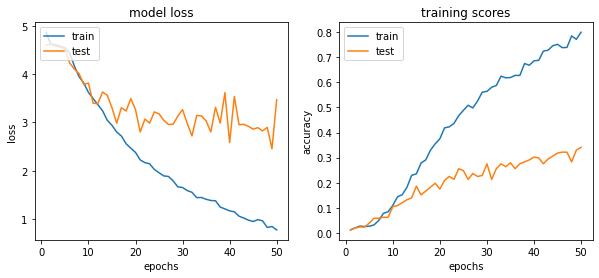

In [27]:
from utils import plot_curves
plot_curves()

#### Results and Evaluation

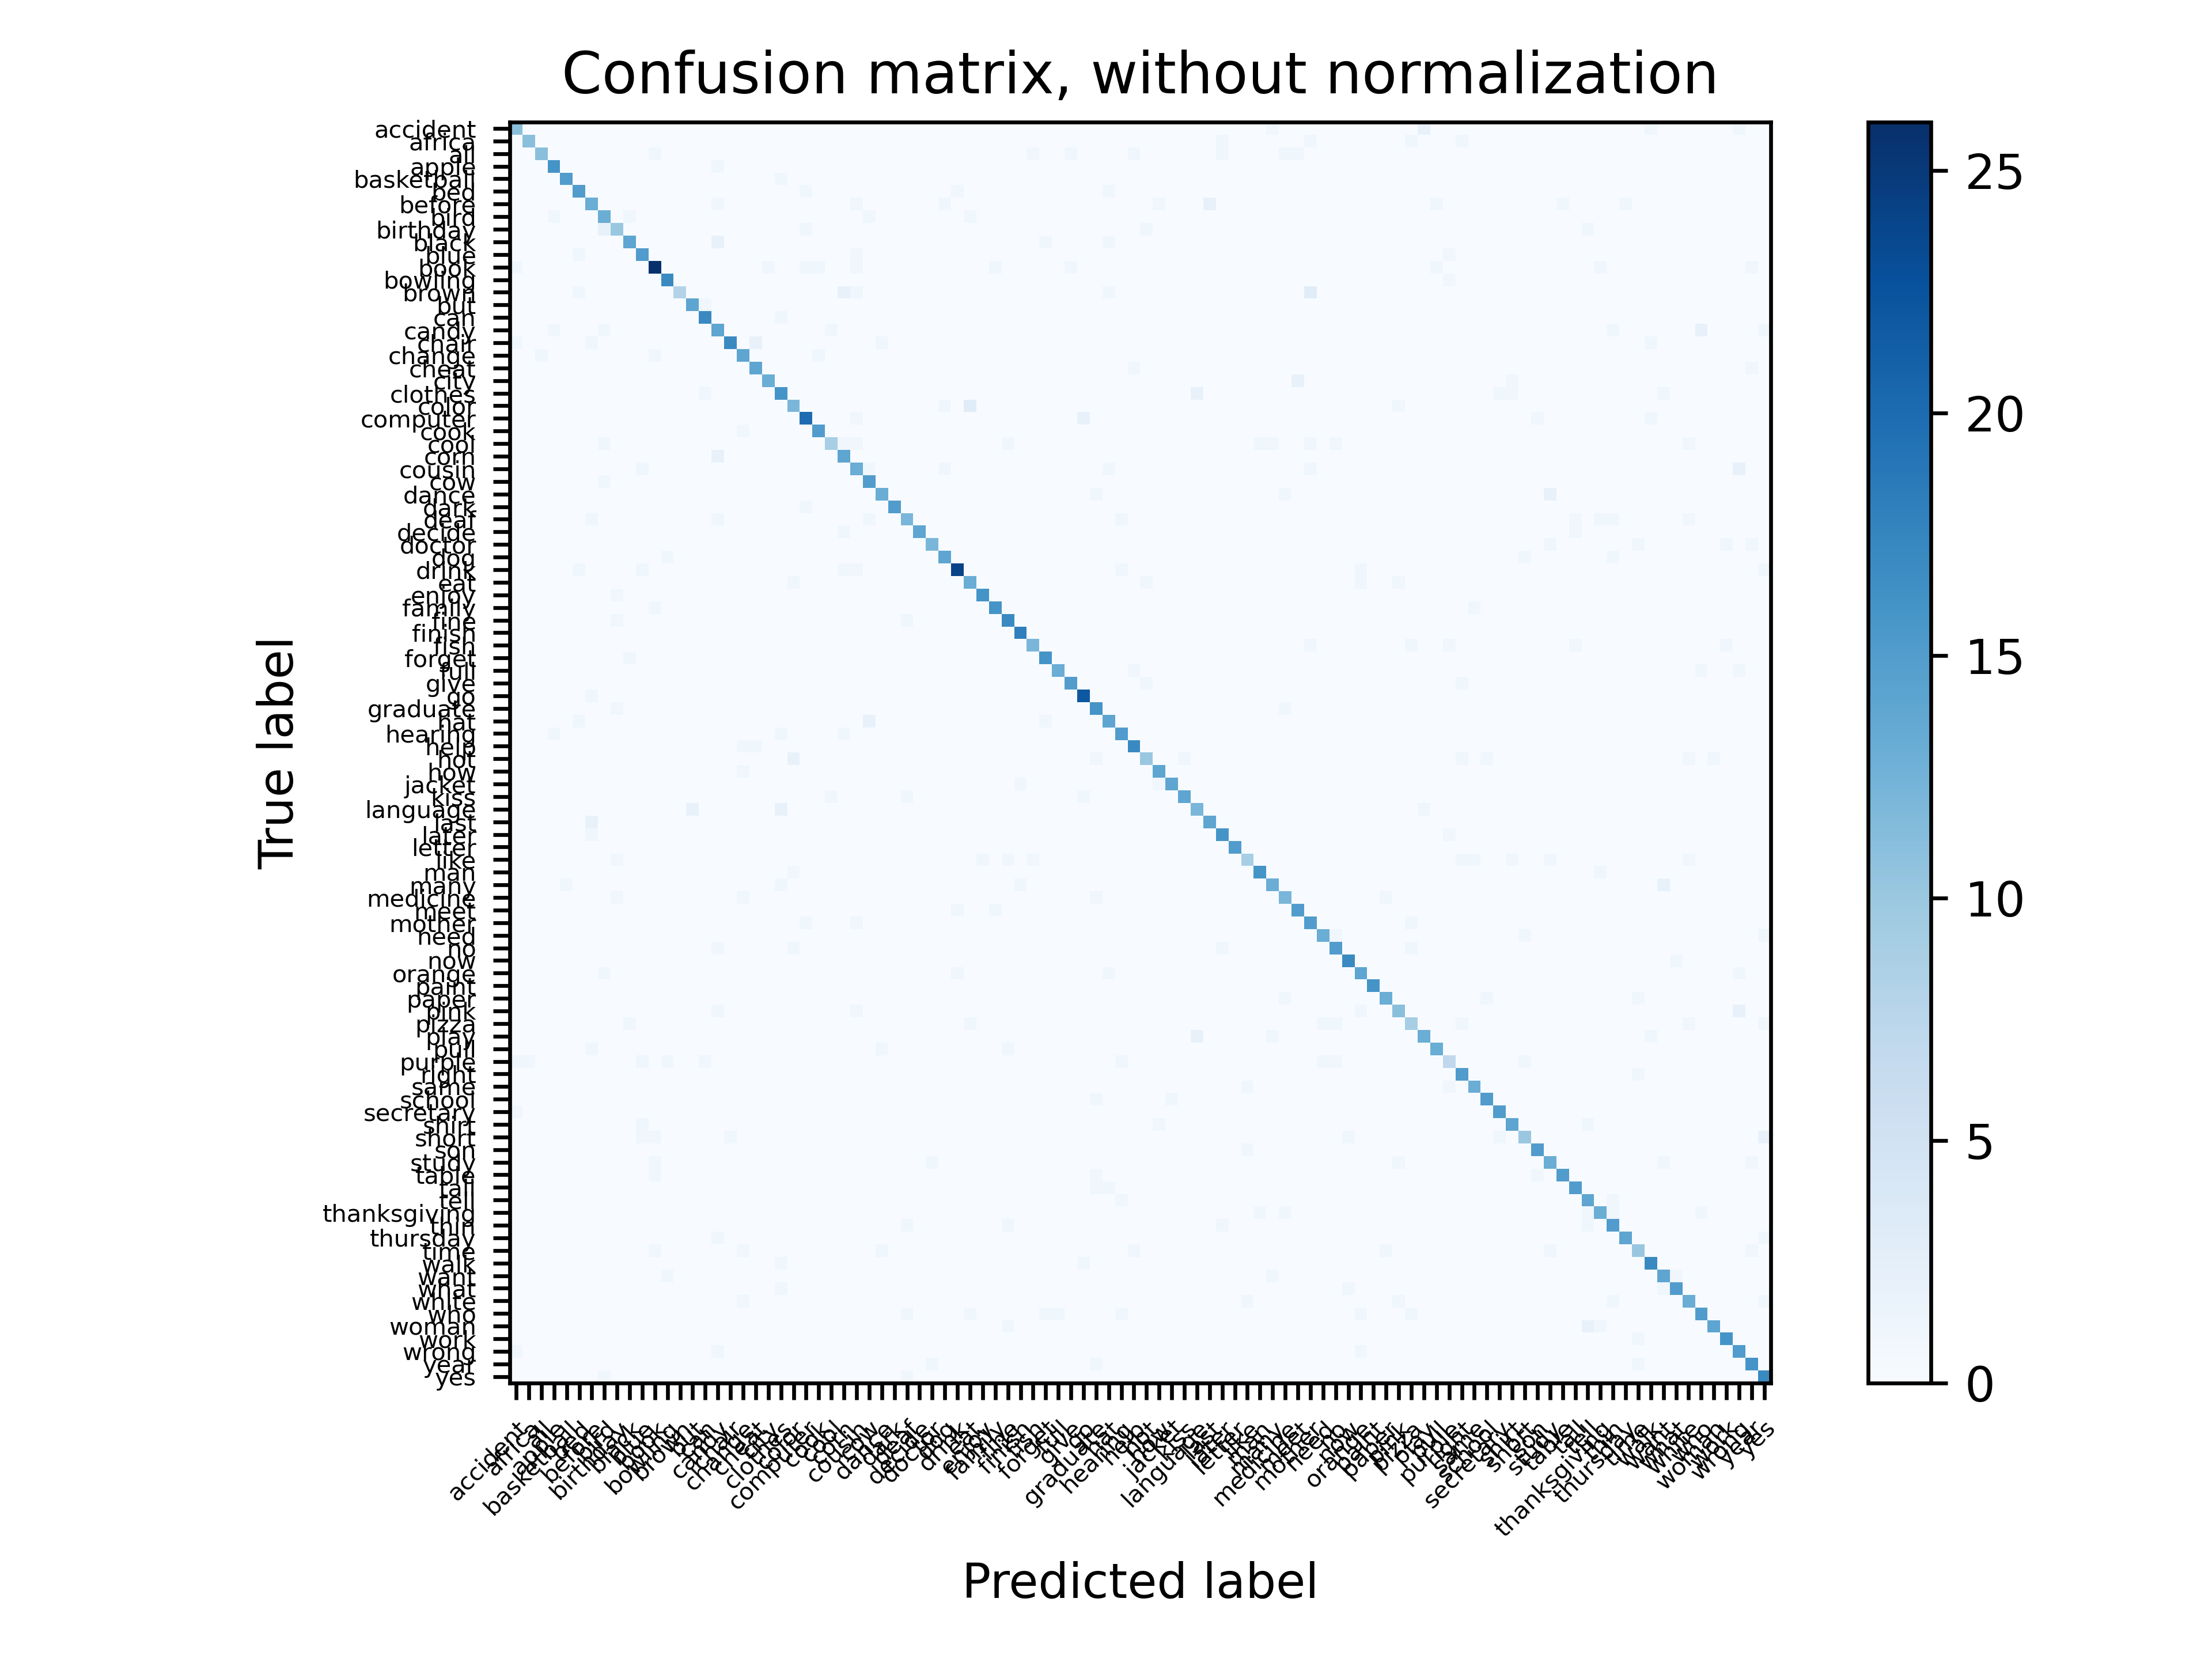

In [28]:
from IPython.display import Image
Image(filename='output/train-conf-mat.png', width=500, height=500) 

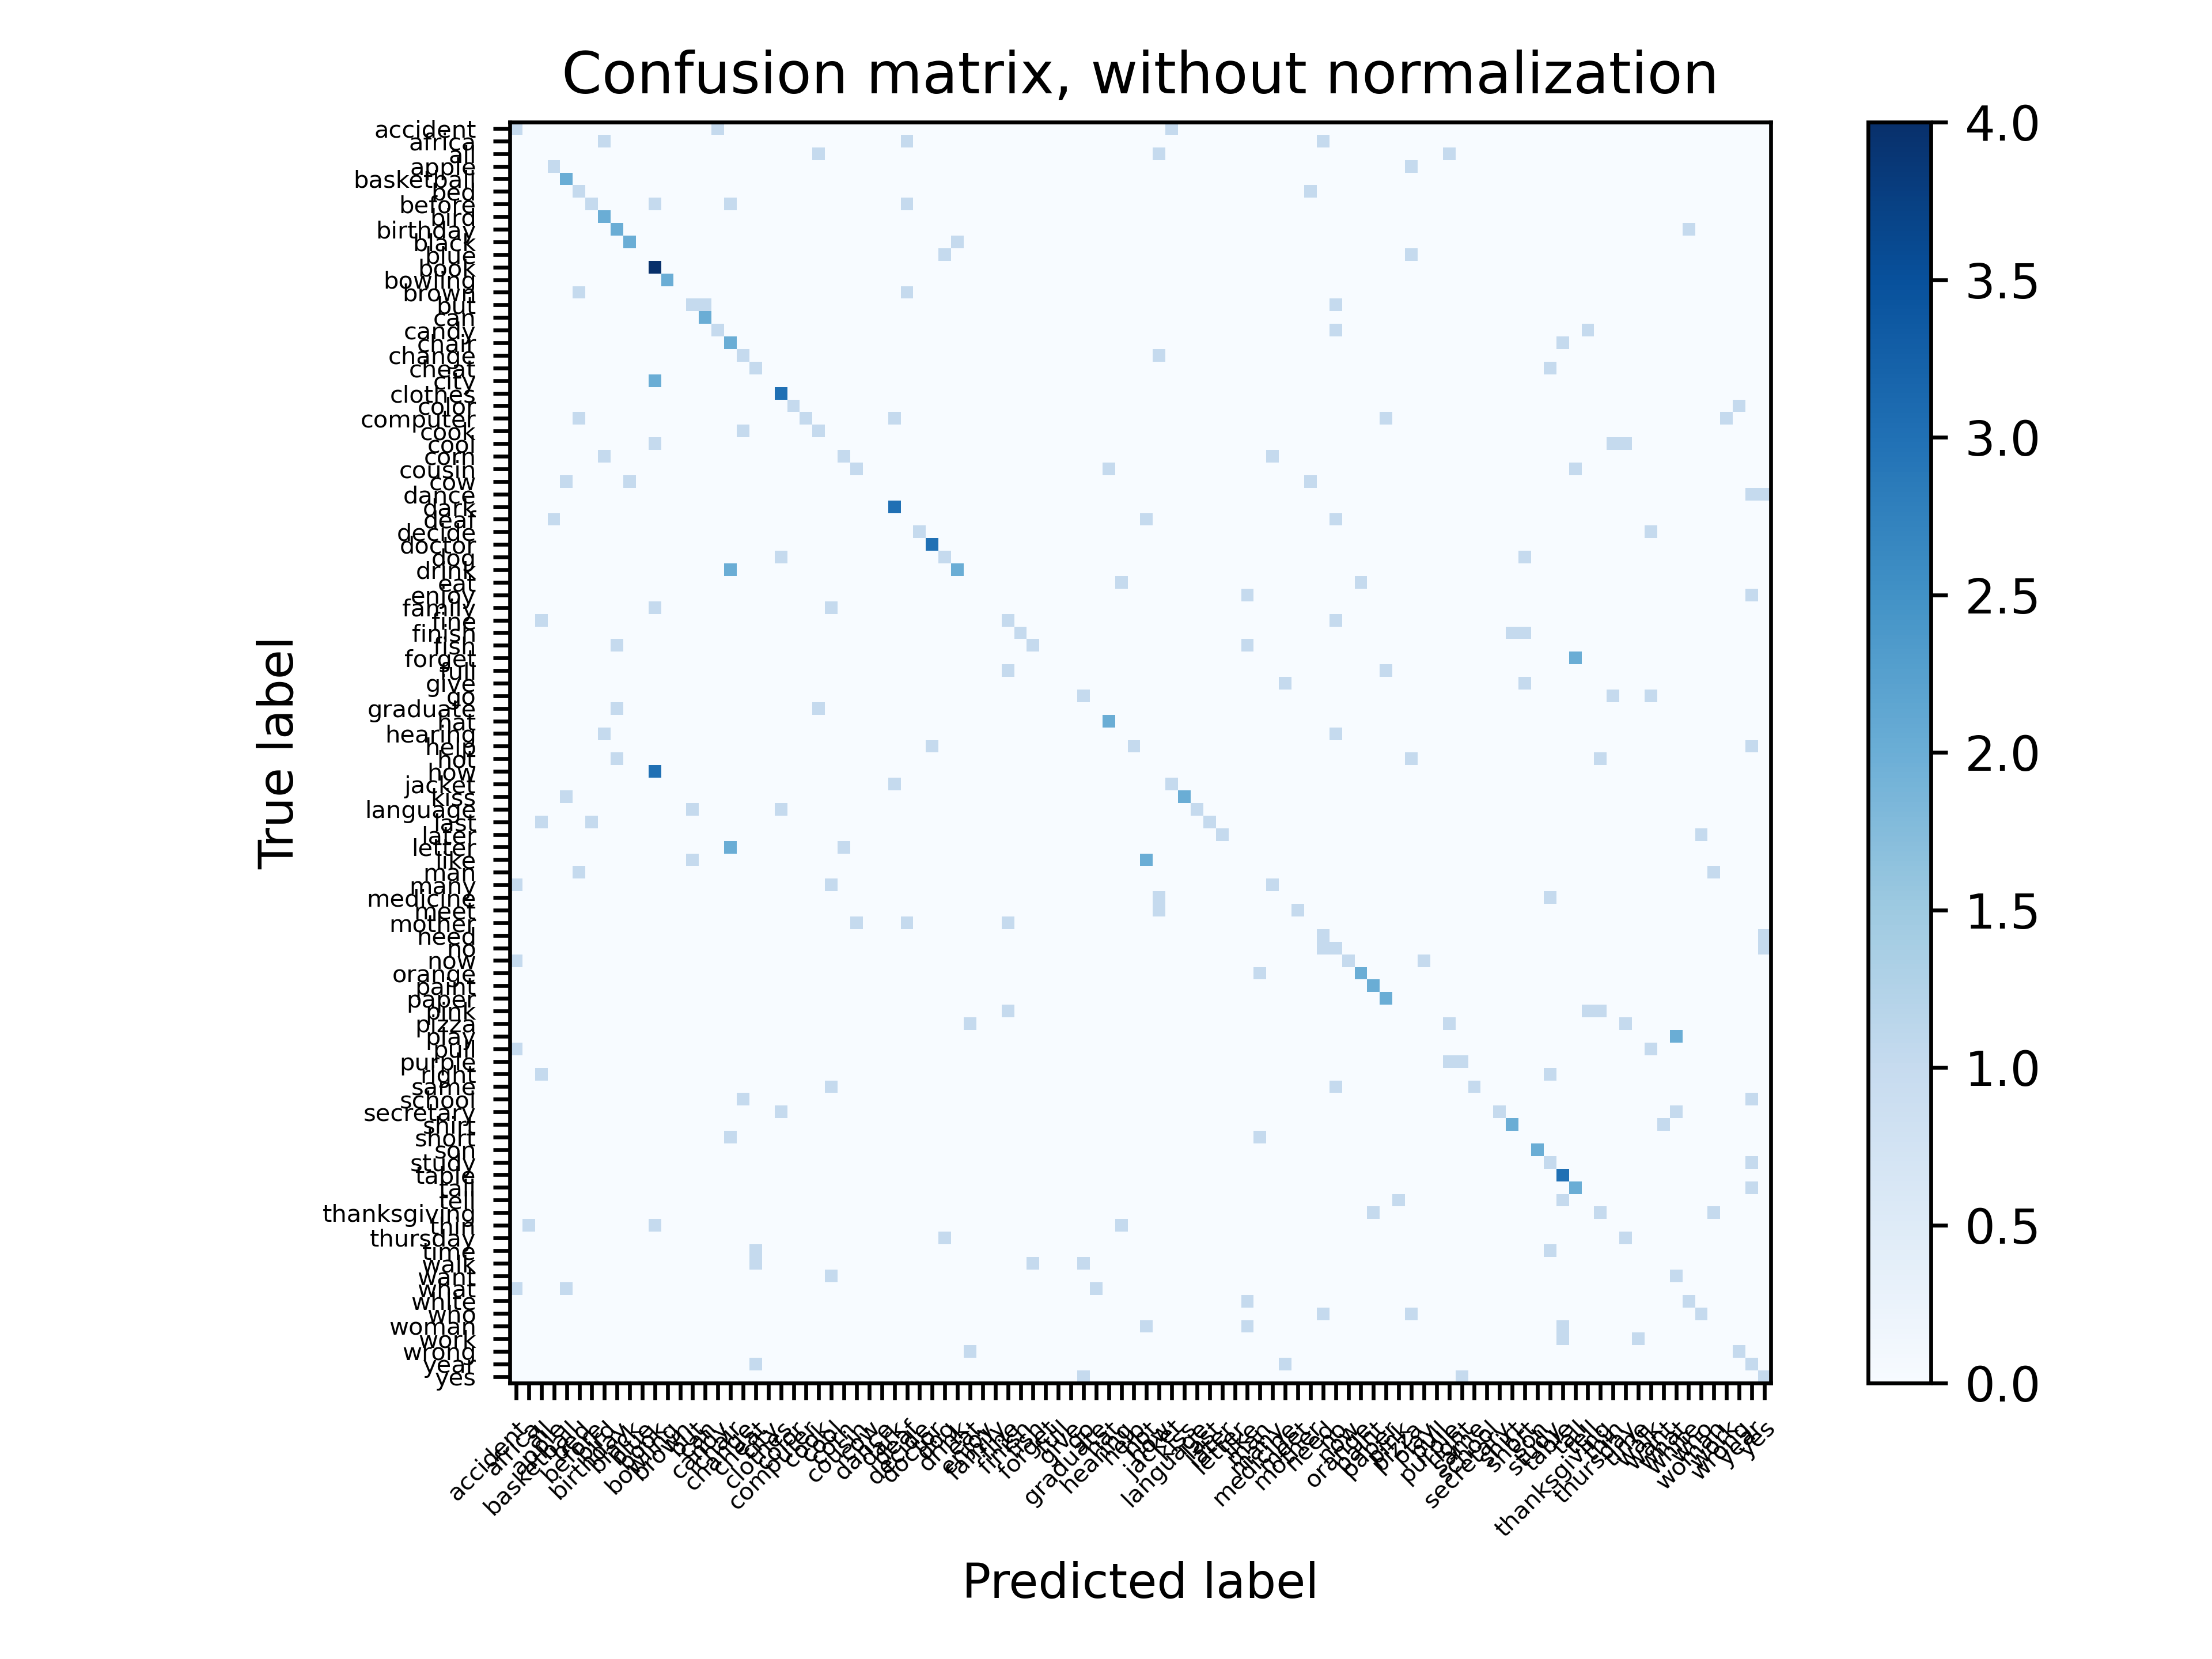

In [29]:
Image(filename='output/val-conf-mat.png', width=500, height=500) 

### With Transformations

#### Dataset Distribution

In [30]:
from dataloader import Sign_Dataset

train_dataset = Sign_Dataset(file_name_index=split_file, split=['train', 'val'], pose_directory=pose_data, img_transforms=None, video_transforms=transformations, num_samples=num_samples)

train_data_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=configs.batch_size,
                                                    shuffle=True)

val_dataset = Sign_Dataset(file_name_index=split_file, split='test', pose_directory=pose_data,
                               img_transforms=None, video_transforms=transformations,
                               num_samples=num_samples, sampling_method='k_copies')
    
val_data_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=configs.batch_size,
                                                  shuffle=True)

In [31]:
print("Dataloader split for training: {}".format(len(train_dataset)))
print("Dataloader split for testing {}".format(len(val_dataset)))


Dataloader split for training: 1780
Dataloader split for testing 258


In [32]:
import json
with open(split_file, 'r') as f:
    content = json.load(f)

        # create label encoder
labels = sorted([label_entry['gloss'] for label_entry in content])

In [33]:
print("Number of classes: {}\n".format(len(labels)))
print(labels)

Number of classes: 100

['accident', 'africa', 'all', 'apple', 'basketball', 'bed', 'before', 'bird', 'birthday', 'black', 'blue', 'book', 'bowling', 'brown', 'but', 'can', 'candy', 'chair', 'change', 'cheat', 'city', 'clothes', 'color', 'computer', 'cook', 'cool', 'corn', 'cousin', 'cow', 'dance', 'dark', 'deaf', 'decide', 'doctor', 'dog', 'drink', 'eat', 'enjoy', 'family', 'fine', 'finish', 'fish', 'forget', 'full', 'give', 'go', 'graduate', 'hat', 'hearing', 'help', 'hot', 'how', 'jacket', 'kiss', 'language', 'last', 'later', 'letter', 'like', 'man', 'many', 'medicine', 'meet', 'mother', 'need', 'no', 'now', 'orange', 'paint', 'paper', 'pink', 'pizza', 'play', 'pull', 'purple', 'right', 'same', 'school', 'secretary', 'shirt', 'short', 'son', 'study', 'table', 'tall', 'tell', 'thanksgiving', 'thin', 'thursday', 'time', 'walk', 'want', 'what', 'white', 'who', 'woman', 'work', 'wrong', 'year', 'yes']


#### GCN Model Training

In [34]:
!python3 ./train.py

Training now...Epoch[1/20]
Train Epoch: 1 [64/1780 (4%)]	Loss: 4.608550, Accu: 1.562500%
Train Epoch: 1 [128/1780 (7%)]	Loss: 4.592208, Accu: 3.125000%
Train Epoch: 1 [192/1780 (11%)]	Loss: 4.583956, Accu: 1.562500%
Train Epoch: 1 [256/1780 (14%)]	Loss: 4.958908, Accu: 1.562500%
Train Epoch: 1 [320/1780 (18%)]	Loss: 5.226195, Accu: 0.000000%
Train Epoch: 1 [384/1780 (21%)]	Loss: 5.295138, Accu: 1.562500%
Train Epoch: 1 [448/1780 (25%)]	Loss: 4.873297, Accu: 1.562500%
Train Epoch: 1 [512/1780 (29%)]	Loss: 4.849600, Accu: 0.000000%
Train Epoch: 1 [576/1780 (32%)]	Loss: 4.906474, Accu: 3.125000%
Train Epoch: 1 [640/1780 (36%)]	Loss: 5.070626, Accu: 4.687500%
Train Epoch: 1 [704/1780 (39%)]	Loss: 4.810333, Accu: 0.000000%
Train Epoch: 1 [768/1780 (43%)]	Loss: 4.745805, Accu: 4.687500%
Train Epoch: 1 [832/1780 (46%)]	Loss: 4.640508, Accu: 3.125000%
Train Epoch: 1 [896/1780 (50%)]	Loss: 4.867228, Accu: 3.125000%
Train Epoch: 1 [960/1780 (54%)]	Loss: 4.702487, Accu: 0.000000%
Train Epoch: 1 [

Train Epoch: 5 [576/1780 (32%)]	Loss: 4.233126, Accu: 6.250000%
Train Epoch: 5 [640/1780 (36%)]	Loss: 4.423444, Accu: 1.562500%
Train Epoch: 5 [704/1780 (39%)]	Loss: 4.204185, Accu: 10.937500%
Train Epoch: 5 [768/1780 (43%)]	Loss: 4.296535, Accu: 6.250000%
Train Epoch: 5 [832/1780 (46%)]	Loss: 4.370026, Accu: 4.687500%
Train Epoch: 5 [896/1780 (50%)]	Loss: 4.429297, Accu: 3.125000%
Train Epoch: 5 [960/1780 (54%)]	Loss: 4.447483, Accu: 0.000000%
Train Epoch: 5 [1024/1780 (57%)]	Loss: 4.088892, Accu: 12.500000%
Train Epoch: 5 [1088/1780 (61%)]	Loss: 4.347047, Accu: 0.000000%
Train Epoch: 5 [1152/1780 (64%)]	Loss: 4.255208, Accu: 3.125000%
Train Epoch: 5 [1216/1780 (68%)]	Loss: 4.376809, Accu: 0.000000%
Train Epoch: 5 [1280/1780 (71%)]	Loss: 4.227314, Accu: 6.250000%
Train Epoch: 5 [1344/1780 (75%)]	Loss: 4.213843, Accu: 4.687500%
Train Epoch: 5 [1408/1780 (79%)]	Loss: 4.243984, Accu: 10.937500%
Train Epoch: 5 [1472/1780 (82%)]	Loss: 4.177635, Accu: 4.687500%
Train Epoch: 5 [1536/1780 (86

Train Epoch: 9 [1088/1780 (61%)]	Loss: 3.732986, Accu: 9.375000%
Train Epoch: 9 [1152/1780 (64%)]	Loss: 3.523158, Accu: 10.937500%
Train Epoch: 9 [1216/1780 (68%)]	Loss: 3.555924, Accu: 20.312500%
Train Epoch: 9 [1280/1780 (71%)]	Loss: 3.444305, Accu: 17.187500%
Train Epoch: 9 [1344/1780 (75%)]	Loss: 3.657750, Accu: 7.812500%
Train Epoch: 9 [1408/1780 (79%)]	Loss: 3.901060, Accu: 10.937500%
Train Epoch: 9 [1472/1780 (82%)]	Loss: 3.593745, Accu: 10.937500%
Train Epoch: 9 [1536/1780 (86%)]	Loss: 3.652708, Accu: 3.125000%
Train Epoch: 9 [1600/1780 (89%)]	Loss: 3.888757, Accu: 7.812500%
Train Epoch: 9 [1664/1780 (93%)]	Loss: 3.641054, Accu: 7.812500%
Train Epoch: 9 [1728/1780 (96%)]	Loss: 3.670417, Accu: 10.937500%
Train Epoch: 9 [1780/1780 (100%)]	Loss: 3.503837, Accu: 9.615385%
Testing now...Epoch[9/20]

Val. set (258 samples): Average loss: 3.5575, Accuracy: 9.30%

Training now...Epoch[10/20]
Train Epoch: 10 [64/1780 (4%)]	Loss: 3.419275, Accu: 20.312500%
Train Epoch: 10 [128/1780 (7%)]

Train Epoch: 13 [1408/1780 (79%)]	Loss: 3.154481, Accu: 20.312500%
Train Epoch: 13 [1472/1780 (82%)]	Loss: 3.329873, Accu: 15.625000%
Train Epoch: 13 [1536/1780 (86%)]	Loss: 3.257657, Accu: 21.875000%
Train Epoch: 13 [1600/1780 (89%)]	Loss: 3.208440, Accu: 17.187500%
Train Epoch: 13 [1664/1780 (93%)]	Loss: 3.216363, Accu: 14.062500%
Train Epoch: 13 [1728/1780 (96%)]	Loss: 3.332963, Accu: 20.312500%
Train Epoch: 13 [1780/1780 (100%)]	Loss: 3.105330, Accu: 15.384615%
Testing now...Epoch[13/20]

Val. set (258 samples): Average loss: 3.4755, Accuracy: 15.89%

Training now...Epoch[14/20]
Train Epoch: 14 [64/1780 (4%)]	Loss: 2.784949, Accu: 31.250000%
Train Epoch: 14 [128/1780 (7%)]	Loss: 2.810797, Accu: 25.000000%
Train Epoch: 14 [192/1780 (11%)]	Loss: 2.618582, Accu: 37.500000%
Train Epoch: 14 [256/1780 (14%)]	Loss: 2.898807, Accu: 29.687500%
Train Epoch: 14 [320/1780 (18%)]	Loss: 2.673351, Accu: 28.125000%
Train Epoch: 14 [384/1780 (21%)]	Loss: 2.845311, Accu: 28.125000%
Train Epoch: 14 [

Train Epoch: 17 [1728/1780 (96%)]	Loss: 2.796753, Accu: 29.687500%
Train Epoch: 17 [1780/1780 (100%)]	Loss: 2.615225, Accu: 30.769231%
Testing now...Epoch[17/20]

Val. set (258 samples): Average loss: 3.2771, Accuracy: 19.38%

Training now...Epoch[18/20]
Train Epoch: 18 [64/1780 (4%)]	Loss: 2.227245, Accu: 39.062500%
Train Epoch: 18 [128/1780 (7%)]	Loss: 2.269994, Accu: 31.250000%
Train Epoch: 18 [192/1780 (11%)]	Loss: 2.461104, Accu: 37.500000%
Train Epoch: 18 [256/1780 (14%)]	Loss: 2.077809, Accu: 45.312500%
Train Epoch: 18 [320/1780 (18%)]	Loss: 2.500250, Accu: 35.937500%
Train Epoch: 18 [384/1780 (21%)]	Loss: 2.161548, Accu: 46.875000%
Train Epoch: 18 [448/1780 (25%)]	Loss: 2.411396, Accu: 34.375000%
Train Epoch: 18 [512/1780 (29%)]	Loss: 2.576001, Accu: 28.125000%
Train Epoch: 18 [576/1780 (32%)]	Loss: 2.532187, Accu: 31.250000%
Train Epoch: 18 [640/1780 (36%)]	Loss: 2.670048, Accu: 21.875000%
Train Epoch: 18 [704/1780 (39%)]	Loss: 2.305218, Accu: 34.375000%
Train Epoch: 18 [768/1

#### Accuracy and Loss Plots

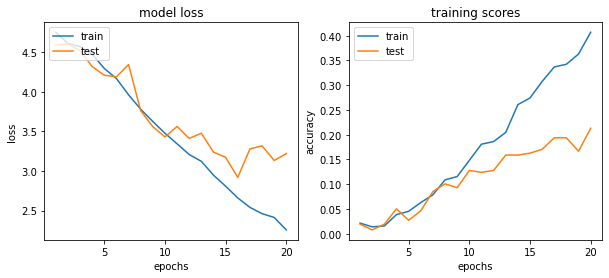

In [35]:
from utils import plot_curves
plot_curves()

#### Results and Evaluation

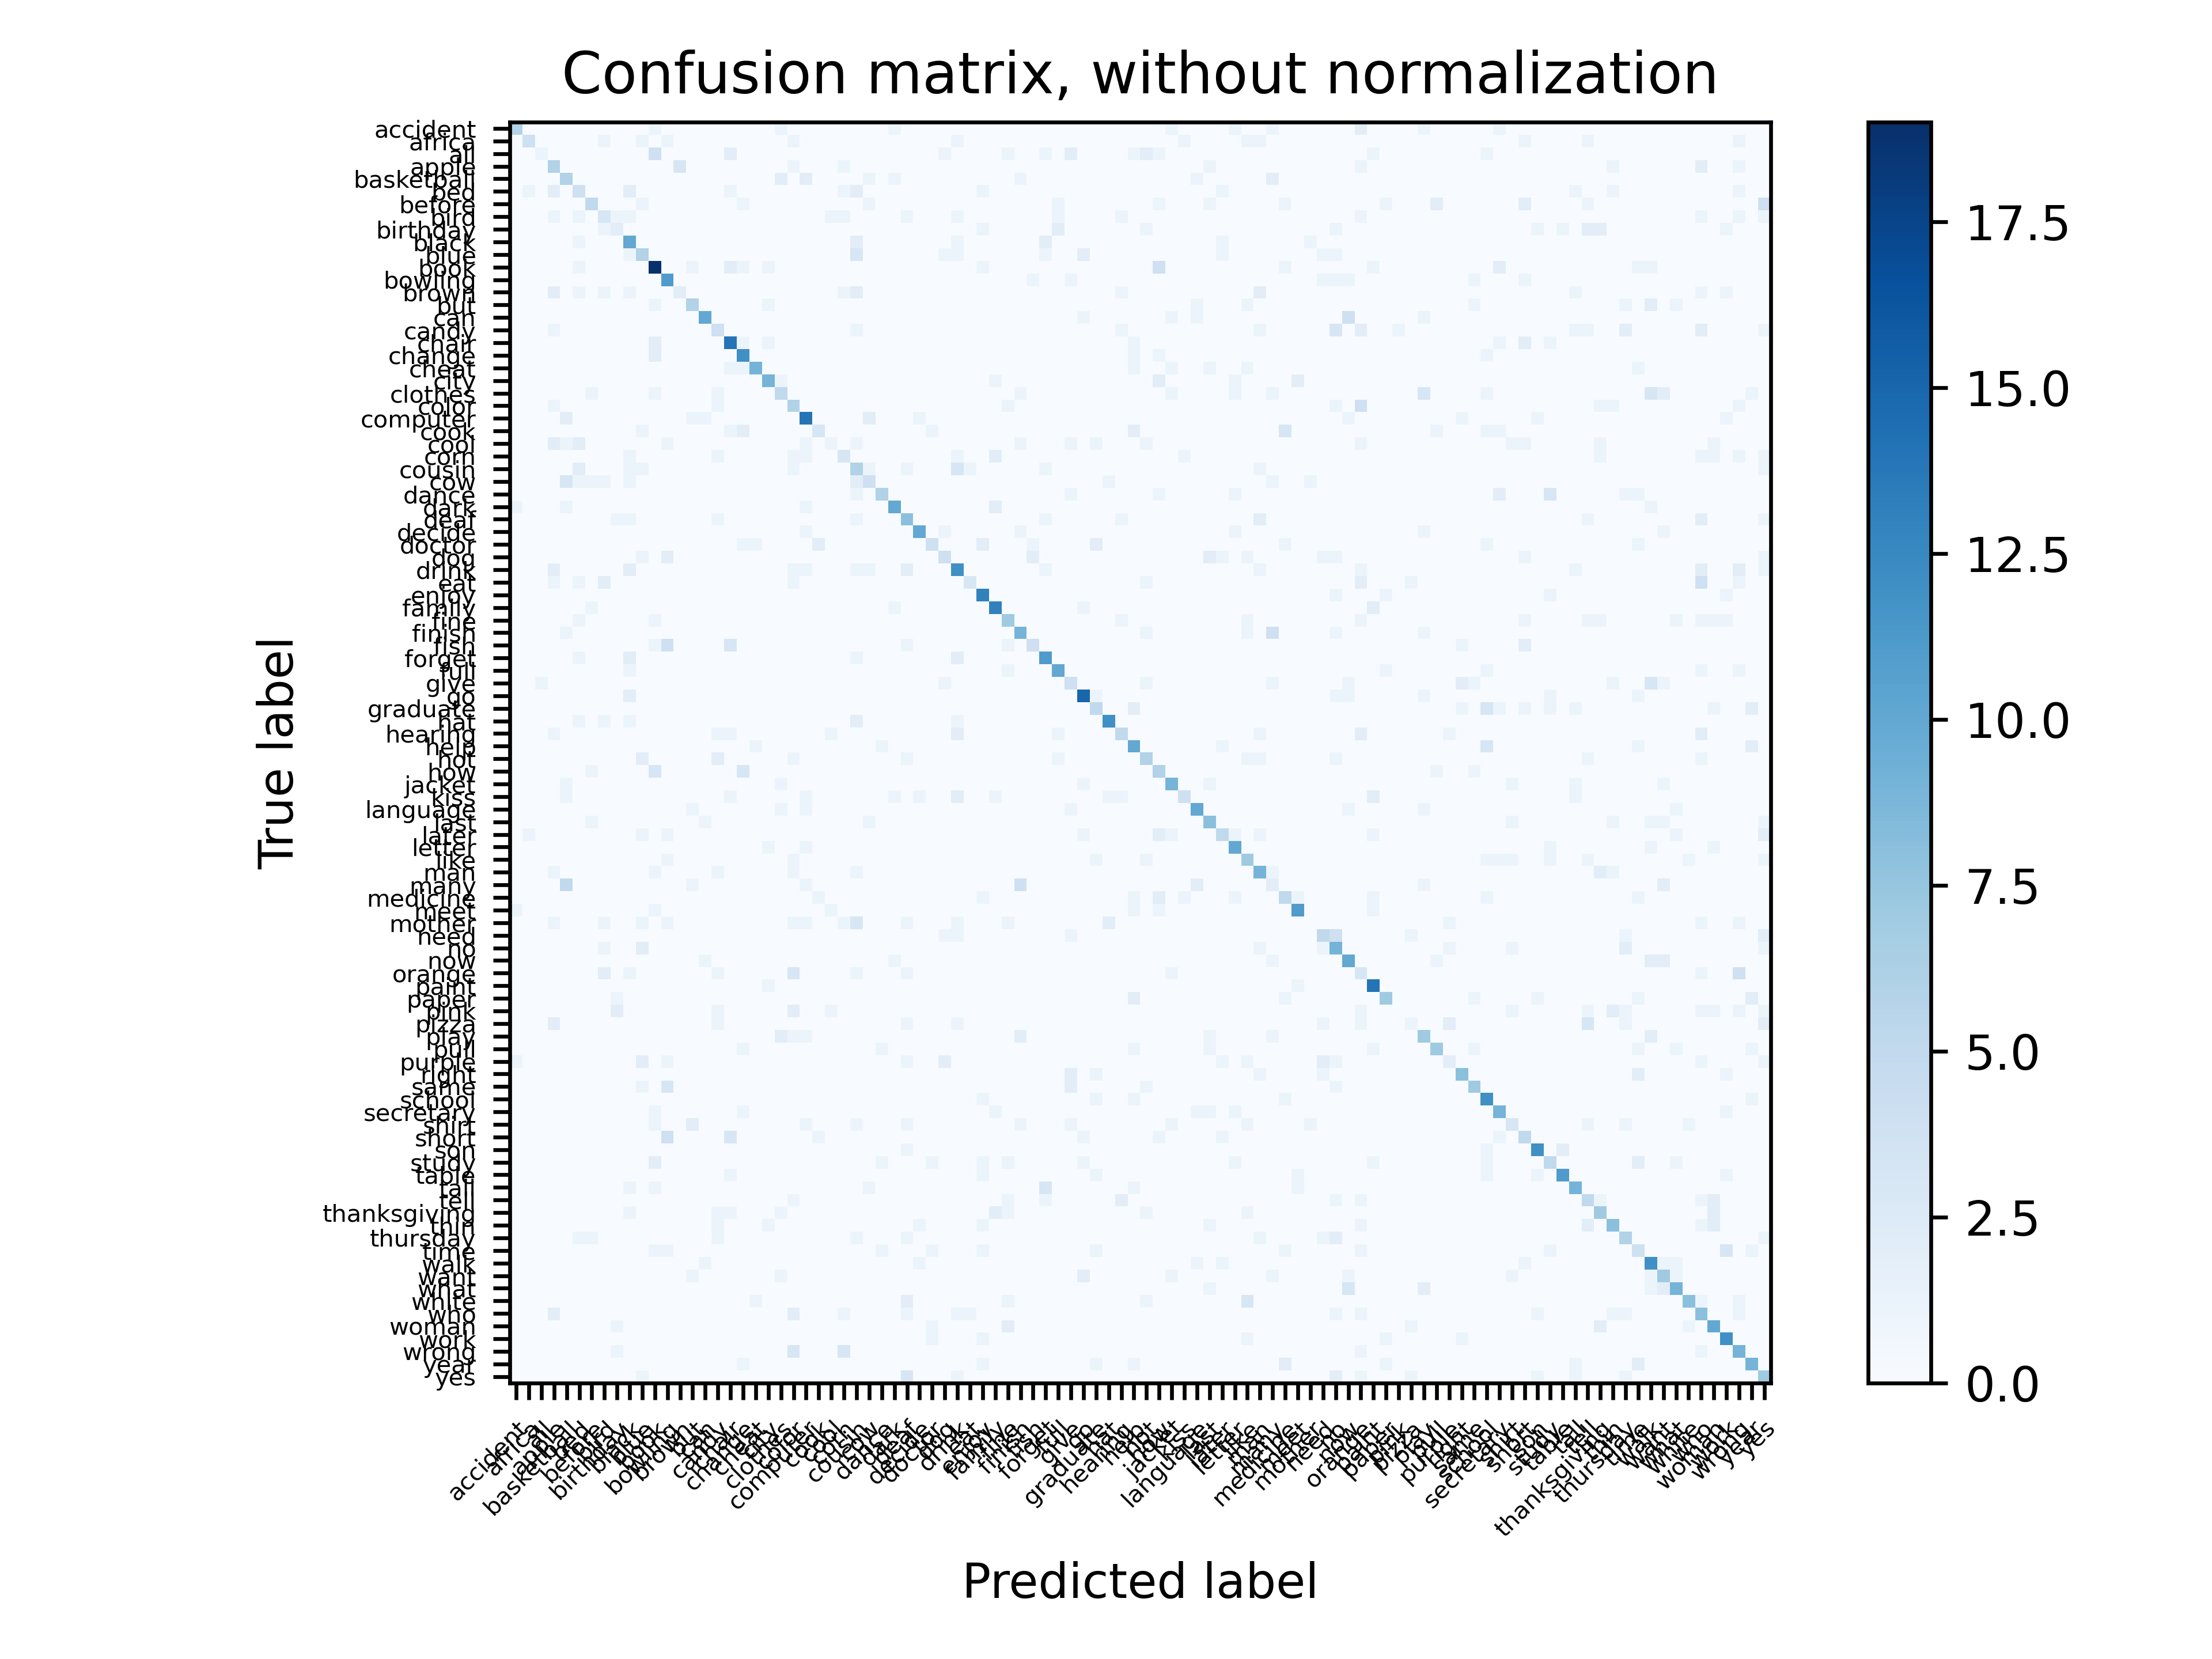

In [36]:
from IPython.display import Image
Image(filename='output/train-conf-mat.png', width=500, height=500) 

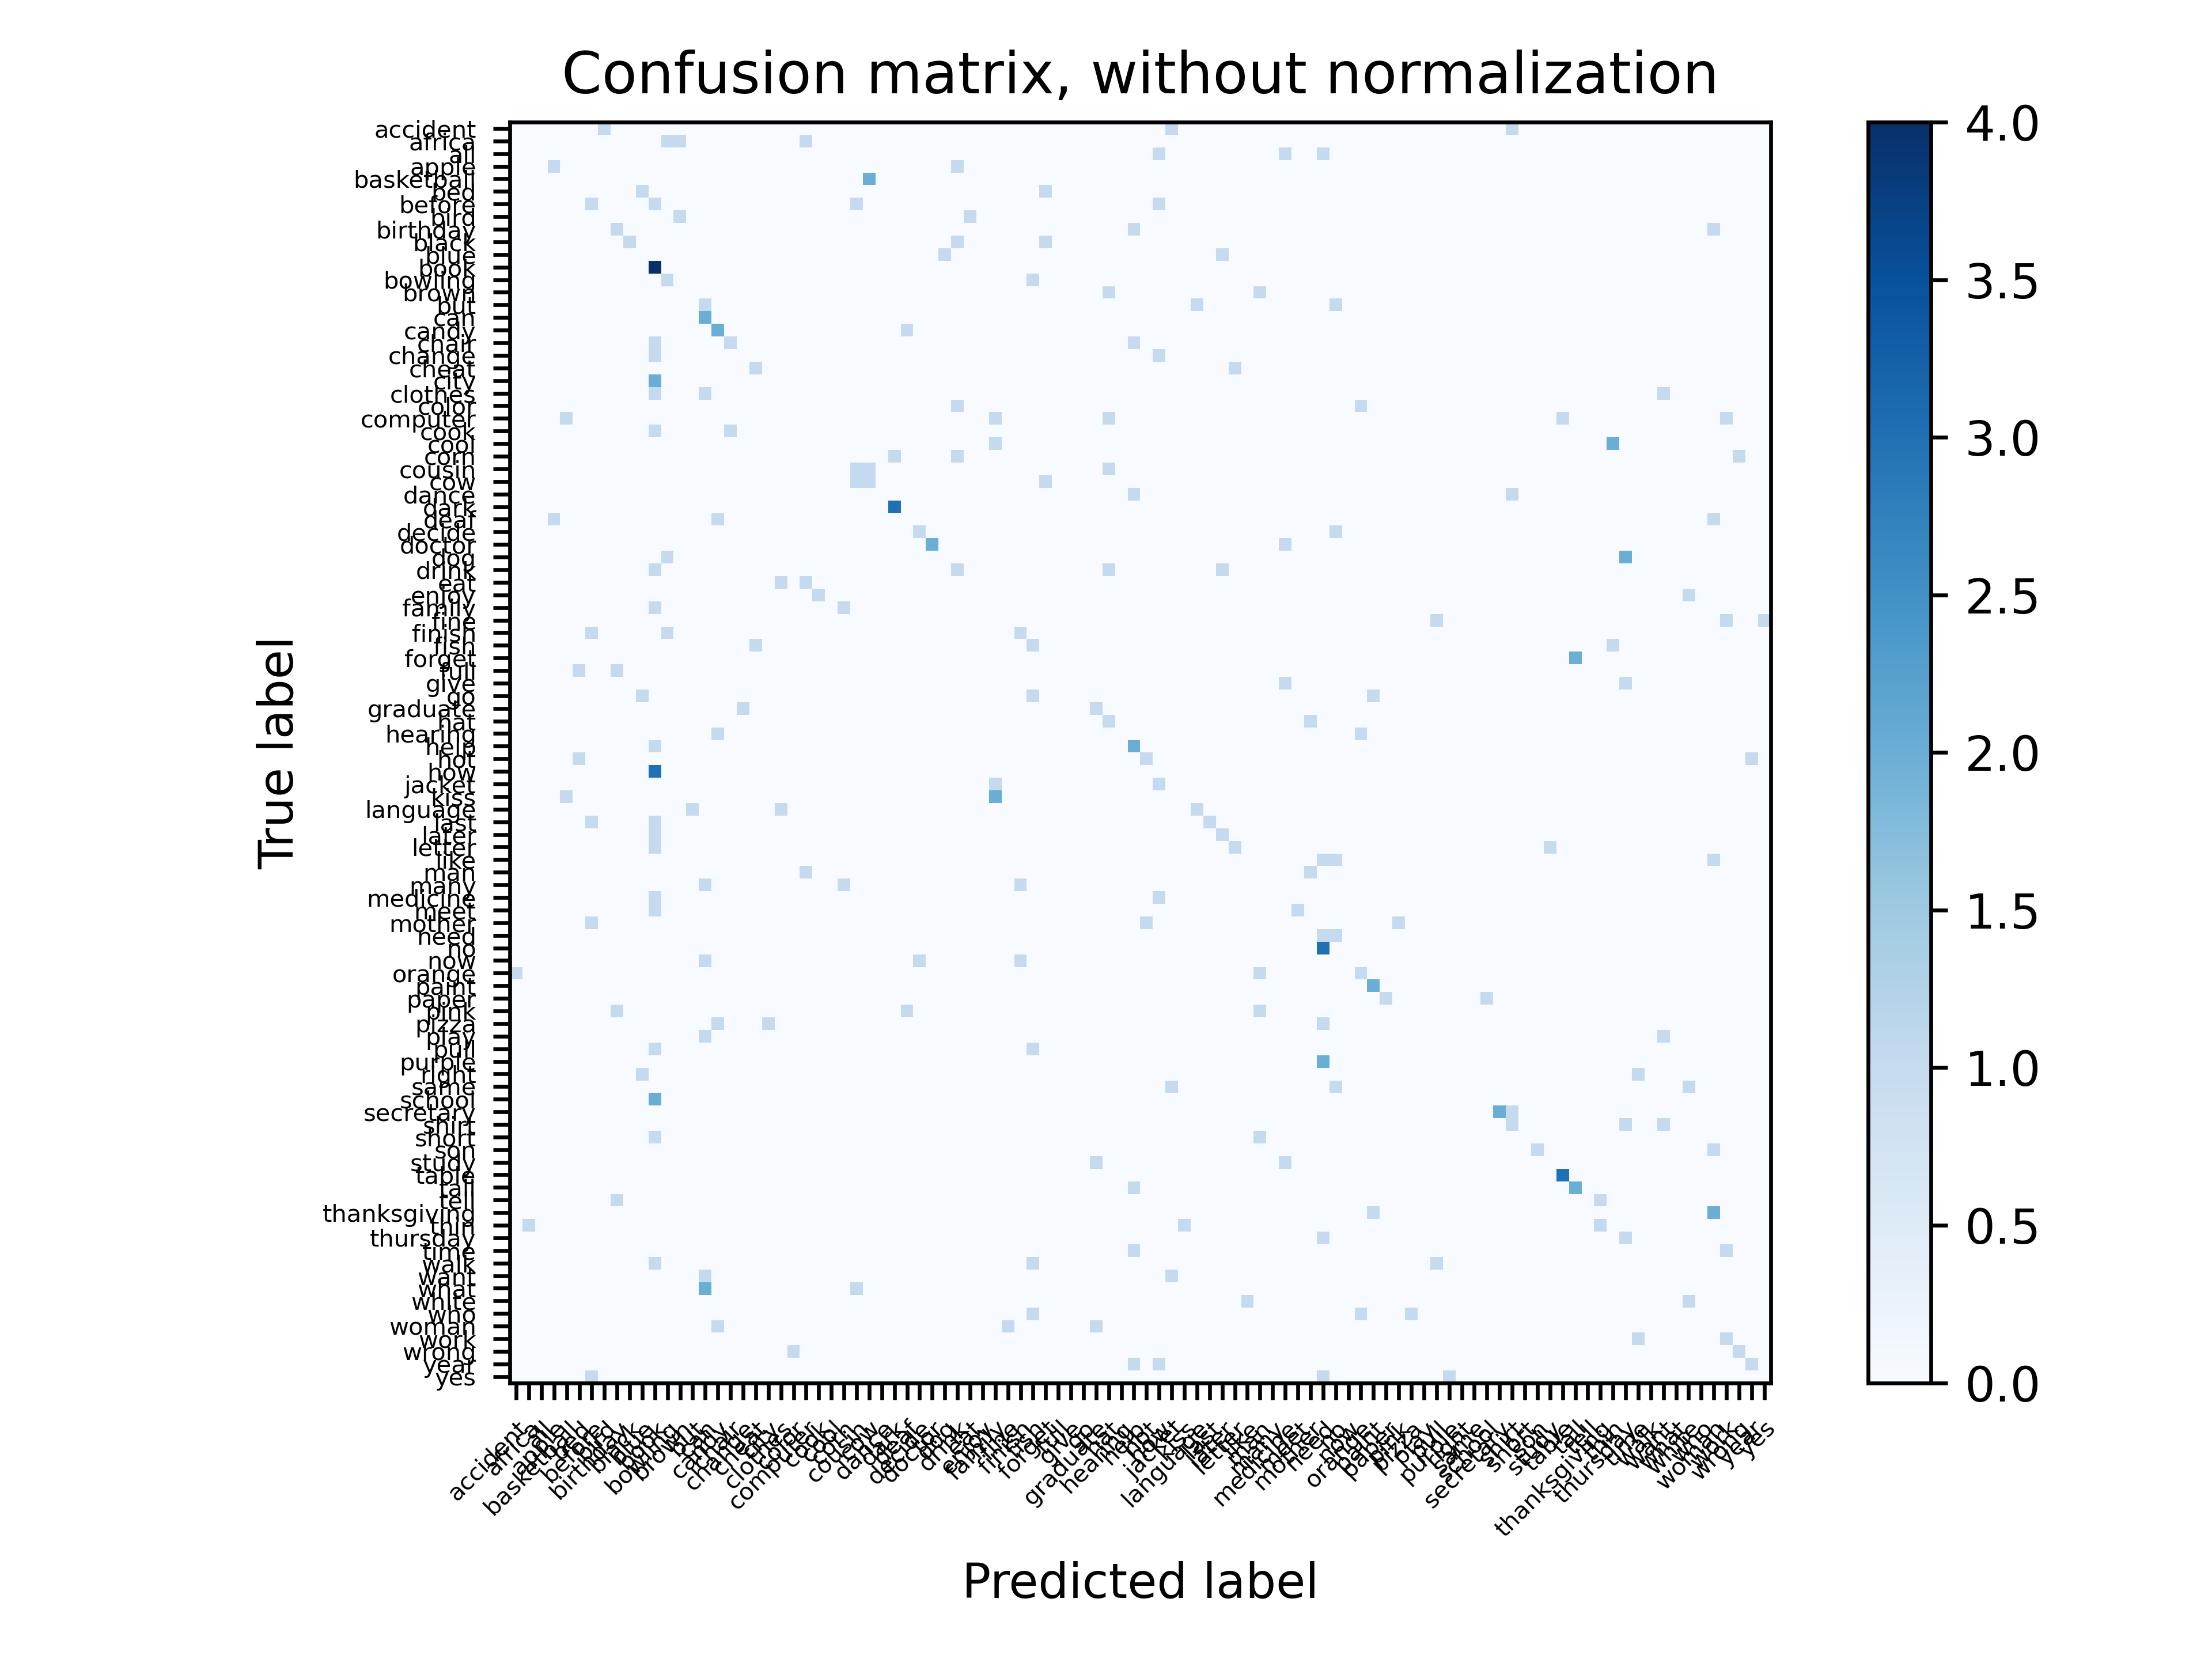

In [37]:
Image(filename='output/val-conf-mat.png', width=500, height=500) 

#### Load a Trained Model

In [8]:
from train import load_model
from train import validation
model = load_model('weights/model_2021_05_03-01:00:17_PM.pt', configs, len(train_dataset.label_encoder.classes_))
val_loss, val_score, val_gts, val_preds, incorrect_samples = validation(model,val_data_loader, epochs,save_to=None)


Val. set (258 samples): Average loss: 2.9288, Accuracy: 25.58%

